<a href="https://colab.research.google.com/github/hariszaf/metabolic_toy_model/blob/main/Antony2025/DNNGIORtraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Use DNNGIOR On Your Own Training Set**

## Google Collab part

In [ ]:
# @title Install dependencies
!pip install tensorflow==2.15.1
!pip install cobra
!pip install dnngior --no-deps
!pip install gurobipy

In [2]:
# @title general dependencies
import numpy as np
import pandas as pd
import os
import sys
from pathlib import Path
import tensorflow as tf

For this workshop we are going to use the NN_Trainer, NN_Predictor and Gapfill classes of DNNGIOR as well as the read_sbml_model from cobra

In [11]:
!git clone https://github.com/hariszaf/metabolic_toy_model.git

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
from dnngior import NN_Trainer
from dnngior import NN_Predictor
from dnngior import Gapfill
from cobra.io import read_sbml_model

Restricted license - for non-production use only - expires 2026-11-23
The rest of dnngior features can be used without it.


## Generating reaction presence dataframe

By default DNNGIOR uses a neural network trained on a best-per-species dataset, that has learned the coocurences of reactions encoded by the genomes. If we want to train our own network we need to prepare our own training data we need to take a set genomes and determine the reactions present. The easiest way for this is to take the draft models of our genomes and generate a binary array encoding which models contain which reactions.

[fig](/figs/training.png)

We need a list of all possible reactions found in our training data, which will serve as the rows in our dataset. We can then go through the models and set a 1 when a reaction is present in that model and 0 when its not. As loading the models will take relatively long, I would advice to keep track of the reactions for every model in a dictionary for the first loop where we are determining the reactome of our training data.

In [ ]:
#path to training models
model_path =  '/content/drive/MyDrive/Antony/one_per_phylum_models'

#list of model-ids of draft-models
paths  = os.listdir(model_path)[:3]
model_ids = []
for filename in paths:
    model_ids.append(filename[:-5])


model_reaction_dic = {}
rxn = []
for file_path, model_id in zip(paths,model_ids):
    print(model_id)
    model = read_sbml_model(os.path.join(model_path, file_path))
    rs = set(model.reactions.list_attr('id'))
    model_reaction_dic[model_id]=rs

    #generate a list of all possible reactions
    for i in list(rs):
         if i not in rxn and not i.startswith('EX_'):
             rxn.append(i)

We can then determine for every draft training models which of these reactions are present and create a binary list of reactions presences. We will end up with a binary array with as rows the different reactions and as columns all models in the training dataset.

In [ ]:
#output path training data
output_path = 'one_per_phylum_training_data_example.csv'

reaction_df=pd.DataFrame(index=rxn, columns=model_ids)

for key, value in model_reaction_dic.items():
    a = []
    for i in rxn:
        if i in value:
            a.append(1)
        else:
            a.append(0)
    reaction_df[key]=a

#saving to pandas file
reaction_df.to_csv(output_path)

We can have a look at the distribution of reaction set sizes to see if the extraction was succesful.

<Axes: >

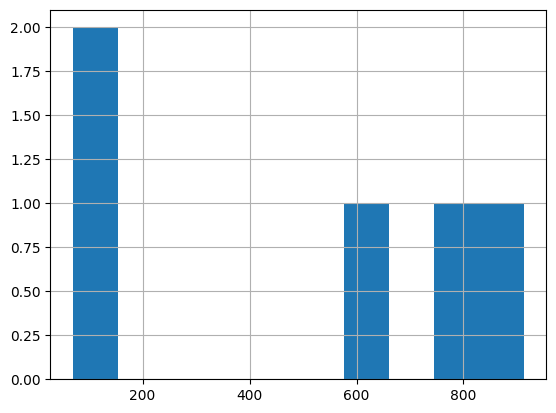

In [ ]:
reaction_df.sum().hist()

### Challenge:

Create a training dataset based on 10 Shewanella models

In [10]:
# @title Solution

#path to training models
model_path =  '/content/drive/MyDrive/Antony/shewanella_models'

#list of model-ids of draft-models
paths  = os.listdir(model_path)
model_ids = []
for filename in paths:
    model_ids.append(filename[:-5])


shewanella_model_reaction_dic = {}
rxn = []
for file_path, model_id in zip(paths,model_ids):
    print(model_id)
    model = read_sbml_model(os.path.join(model_path, file_path))
    rs = set(model.reactions.list_attr('id'))
    shewanella_model_reaction_dic[model_id]=rs

    #generate a list of all possible reactions
    for i in list(rs):
         if i not in rxn and not i.startswith('EX_'):
             rxn.append(i)

#output path training data
output_path = 'shewanella_training_data.csv'

shewanella_reaction_df=pd.DataFrame(index=rxn, columns=model_ids)

for key, value in shewanella_model_reaction_dic.items():
    a = []
    for i in rxn:
        if i in value:
            a.append(1)
        else:
            a.append(0)
    shewanella_reaction_df[key]=a

#saving to pandas file
shewanella_reaction_df.to_csv(output_path)


1197174_alishewanella_aestuarii_b11_gca_000280055


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


1195246_alishewanella_agri_bl06_gca_000272005


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


1129374_alishewanella_jeotgali_kctc_22429_gca_000245735


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


1856684_alishewanella_sp_hh_zs_gca_001704375


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


1651088_alishewanella_sp_wh16_1_gca_001441695


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


2338552_parashewanella_curva_gca_003675895


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


342950_parashewanella_spongiae_gca_003676335


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


38313_shewanella_algae_gca_001870495


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


38313_shewanella_algae_gca_003721455


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


326297_shewanella_amazonensis_sb2b_gca_000015245


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


271099_shewanella_atlantica_gca_003966265


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


693974_shewanella_baltica_ba175_gca_000147735


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


62322_shewanella_baltica_gca_001620325


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


62322_shewanella_baltica_gca_900456975


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


325240_shewanella_baltica_os155_gca_000015845


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


399599_shewanella_baltica_os195_gca_000018765


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


407976_shewanella_baltica_os223_gca_000021665


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


43661_shewanella_benthica_gca_900476435


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


2018305_shewanella_bicestrii_gca_002216875


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


271096_shewanella_canadensis_gca_003966225


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


558541_shewanella_chilikensis_gca_003217175


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


23_shewanella_colwelliana_gca_001735525


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


1353536_shewanella_decolorationis_s12_gca_000485795


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


318161_shewanella_denitrificans_os217_gca_000013765


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


552357_shewanella_fodinae_gca_004342405


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


56812_shewanella_frigidimarina_gca_001529365


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


318167_shewanella_frigidimarina_ncimb_400_gca_000014705


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


458817_shewanella_halifaxensis_haw_eb4_gca_000019185


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


1965282_shewanella_khirikhana_gca_003957745


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


150120_shewanella_livingstonensis_gca_003855395


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


323850_shewanella_loihica_pv_4_gca_000016065


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


1515746_shewanella_mangrovi_gca_000753795


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


260364_shewanella_marisflavi_gca_002215585


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


2520507_shewanella_maritima_gca_004295345


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


365591_shewanella_morhuae_gca_900156405


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


70863_shewanella_oneidensis_gca_003241225


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


398579_shewanella_pealeana_atcc_700345_gca_000018285


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


225849_shewanella_piezotolerans_wp3_gca_000014885


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


2487742_shewanella_psychromarinicola_gca_003797165


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


225848_shewanella_psychrophila_gca_002005305


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


399804_shewanella_putrefaciens_200_gca_000169215


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


319224_shewanella_putrefaciens_cn_32_gca_000016585


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


24_shewanella_putrefaciens_gca_002157365


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


24_shewanella_putrefaciens_gca_003315425


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


24_shewanella_putrefaciens_gca_900457045


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


24_shewanella_putrefaciens_gca_900457125


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


24_shewanella_putrefaciens_gca_900636665


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


24_shewanella_putrefaciens_gca_900636855


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


425104_shewanella_sediminis_haw_eb3_gca_000018025


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


1880834_shewanella_sp_10n_286_48_b5_gca_002874355


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


1880836_shewanella_sp_10n_286_51_b7_gca_002873615


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


2058330_shewanella_sp_ald9_gca_002836315


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


94122_shewanella_sp_ana_3_gca_000203935


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


1975537_shewanella_sp_cg12_big_fil_rev_8_21_14_0_65_47_15_gca_002783505


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


1975535_shewanella_sp_cg_4_10_14_3_um_filter_42_91_gca_002783895


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


1521167_shewanella_sp_cp20_gca_000832025


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


1930557_shewanella_sp_fdaargos_354_gca_002209245


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


2058316_shewanella_sp_gutdb_meldb_gca_002836075


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


327275_shewanella_sp_hn_41_gca_000217915


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


60481_shewanella_sp_mr_7_gca_000014665


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


2054186_shewanella_sp_opt22_gca_004168585


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


1723761_shewanella_sp_p1_14_1_gca_001401775


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


2059264_shewanella_sp_pdp11_gca_002838165


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


2029986_shewanella_sp_we21_gca_002966515


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


637905_shewanella_violacea_dss12_gca_000091325


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


392500_shewanella_woodyi_atcc_51908_gca_000019525


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


332186_shewanella_xiamenensis_gca_001723195


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


## Training the Neural Network

Now that we have prepared the training data, we can start training the network. During training the network will generate the feature by randomly deleting reactions from the input data and then try to predict the missing reactions.

We do this using the train function of the `NN_Trainer` class. This function will return a object of the predictor class (`NN_predictor`) containing the network, the reaction keys and modeltype. If a `output_path` is provided, it will also save it as a npz file.


In [ ]:
#Load in a our training sample
training_data_path = '/files/one_per_phylum_training_data.csv'
training_data = pd.read_csv(training_data_path, index_col=0)

#set save path
save_path = '/files/NN_phylum.npz'

#Train the network
NN_example = NN_Trainer.train(data=training_data, modeltype='ModelSEED',output_path=save_path)

print("The weights of the first layer of the network: \n{}".format(NN_example.network[0][0]))
print("The rxn_keys: \n{}".format(NN_example.rxn_keys.values))
print("The Modeltype: {}".format(NN_example.modeltype))

 By default the network in the NN_predictor is not a full tensorflow object but rather an array of the weights and biases of the different layers. It can still be used to make predictions while being less memory intensive by using matrix multiplication:

        a = input
        for layer in self.network:
            a = a.clip(0)
            a = ((a @ layer[0]) + layer[1])
        prediction =  1 / (1 + np.exp(-a))#sigmoid(a)
        
Which is build into the NN_Predictor class.

### Challenge:
Train a neural network specialised for the Shawanella genus.

 (Note: I have provided a full training dataset of all Shawanella models as `shewanella_training_dataset.csv`)

In [ ]:
# @title Solution
#Load in a our training sample
shewanella_training_data_path = 'one_per_phylum_training_data.csv'
shewanella_training_data = pd.read_csv(training_data_path, index_col=0)

#set save path
save_path = 'NN_shewanella.npz'

#Train the network
NN_shewanella = NN_Trainer.train(data=shewanella_training_data, modeltype='ModelSEED',output_path=save_path)

## Making predictions

As expected we can now use the network to make predictions directly using the predict funciton or have the gapfiller use the new network to gapfill models using the `trainedNNPath` argument from the gapfill class

#reactions not found in NN-keys:  65 / 726


<Axes: >

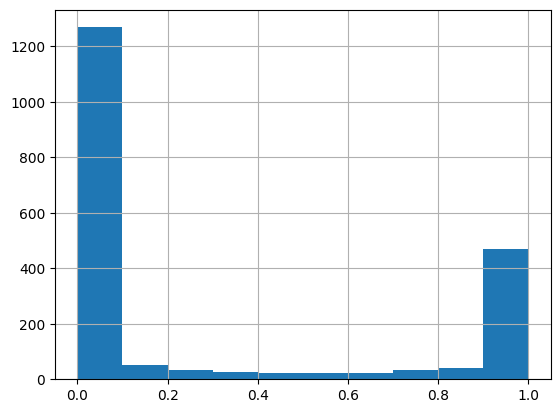

In [ ]:
path_to_draft_model = '/files/models/Bifidobacterium adolescentis_atcc_15703.sbml'
draft_model = read_sbml_model(path_to_draft_model)
p = NN_example.predict(draft_model)
pd.Series(p).hist()
gapfill_model_custom_nn = Gapfill(draftModel = path_to_draft_model, objectiveName = 'bio1', trainedNNPath='../files/NN_phylum.npz')


### Challenge:

Use your newly trained network to gapfill any of the Shawanella models.

In [ ]:
# @title Solution
path_to_draft_model = '../files/models/shawanella_models/1129374_alishewanella_jeotgali_kctc_22429_gca_000245735.sbml'
gapfill_model_shewanella = Gapfill(draftModel = path_to_draft_model, objectiveName = 'bio1', trainedNNPath='NN_shewanella.npz')


# For the interested: Changing feature generation parameters

Basically you now know how to train networks but there are many additional changes you want to make during training.

During training the `generate_feature` function will automatically generate the training dataset. You can change several parameters for the generation of the feature:

1. You can change the number of times each training model is used (nuplo, default=30).
2. You can change the range of deletion percentages (min_for and max_for, default = 0.05 and 0.3), which will be removed in equal sized steps based on the number of replicates.
3. You can weigh the deletion of certain reactions (del_p, default=None).
4. You can also add false reactions (min_con and max_con) during training and change the weights of addition (con_p)*

*Note: we do not currently use this for dnngior as it would not work with the masking of input reactions as the mask does not differentiate between contamination and real reactions.

In the following example we set nuplo to 300 instead of 30, and we vary deletion between 0.2 and 0.5.

`custom_feature = NN_Trainer.generate_feature(training_data, nuplo=300, min_for = 0.2, max_for = 0.5)`

For convenience you can give the parameters to the train function and they will be passed on.

`network = NN_Trainer.train(data=training_data, nuplo=300, min_for=0.2, max_for=0.5, modeltype='ModelSEED',save=False)`

### Challenge

Train a neural network where the deletions are weighed by the frequency of the reaction

In [ ]:
# @title Solution
frequency = training_data.sum(axis=1)
NN_Trainer(training_data, del_p = frequency)

# For the interested: Changing network parameters

Finally, you can rely on the default parameters to define the network which we optimised for our usecase, but for optimal perfomance on different datasets, you might want to change the hyperparameters (dropout, batch size), the architecture (nnodes, nlayers) or bias of predicted classes (bias0). You can also disable the masking of input positions during loss calculation (maskI=False).

You can also provide a validation split which will set apart a part of your input data during training and calculate scores after to validate your network.

###Challenge:

Train a network that can predict contamination instead of omissions.

In [ ]:
# @title Solution
network = NN_Trainer.train(data=training_data, maskI=False, min_con = 0.05, max_con=0.55, modeltype='ModelSEED',save=False)

# For the extra interested: Tensorflow object

By default the function returns a class with the simplified network but you very well might want instead the full Tensorflow network. To do this you can set return_full_network = True, which will change the NN_predictor to contain a Tensorflow network instead, there modeltype and rxn keys work the same. If you want to save this different class you need to change the file extension to .h5.

If you set return_history = True it will also return the history of training for optimisation purposes.

In [ ]:
save_path = os.path.join('files', 'NN_phylum.h5')
NN_tensorflow, history = NN_Trainer.train(data=training_data, return_full_network=True, modeltype='ModelSEED', output_path=save_path, return_history=True)

The main reason we dont use the full network is to save space and time, we can see that the tensorflow object is four times the size

In [ ]:
!ls files/NN_phylum* -lh

-rw-r--r-- 1 meine binf  16M Feb 28 16:52 NN_phylum.h5
-rw-r--r-- 1 meine binf 4.0M Feb 28 16:44 NN_phylum.npz


In [ ]:
print("The summary of the network: \n{}".format(NN_tensorflow.network.summary()))
print("The rxn_keys: \n{}".format(NN_tensorflow.rxn_keys))
print("The Modeltype: {}".format(NN_example.modeltype))

With the history you can do whatever you want, for example plot the loss function over the epochs.

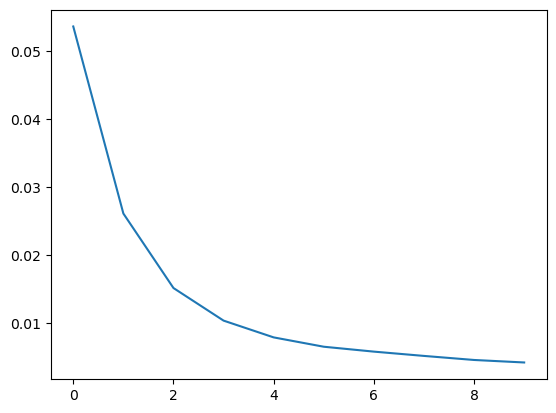

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

By default the network will asume that your input (the data without deletions) should be what the network tries to predict. Alternatively, you can provide labels (the full set of reactions) for the network to try and predict. The following is a slightly convoluted way to have the network only predict missing reactions and have it predict reactions already present as 0.

In [ ]:
manual_feature = NN_Trainer.generate_feature(training_data.T, nuplo=30, min_con=0, max_con=0, min_for = 0.05, max_for = 0.3, del_p = None, con_p = None)
manual_training_data = pd.DataFrame(columns = training_data.index, data=manual_feature)
manual_labels = 1 - manual_feature

network = NN_Trainer.train(data=manual_training_data, rxn_keys=training_data.index, labels=manual_labels, maskI=False, min_for=0.0, max_for=0.0, modeltype='ModelSEED',save=False)